In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
constants = {
    'S0': 1000, # molleculs
    'S_max': 100000, # molleculs
    'V_deg': 100, # molleculs/ms
    'V_uptake': 1000, # molleculs/ms
    'U_0': -70, # mV
    'U_spike': 30, # mV
    'U_R2': 0.05, # mV/ms
    'U_R3': 0.1, # mV/ms
    'U_R4': 0.13, # mV/ms
    'P_R2': 0.6,
    'P_R3': 0.71,
    'P_R4': 0.97,
    'T': 10000 # ms
}

In [5]:
def calculate_S(times, V_rel):
    return constants['S0'] + times*(V_rel - constants['V_deg'] - constants['V_uptake'])

In [6]:
def calculate_Q(S, n, number):
    Q = np.zeros(S.shape)
    for it, S_cur in enumerate(S):
        P_rn = (S_cur * constants[f'P_R{n}'])/constants['S_max']
        random_values = np.random.uniform(size=(number,))
        Q[it] = np.sum(random_values < P_rn)
    return Q

In [7]:
def calculate_U(Q_2, Q_3, Q_4):
    U = np.zeros(Q_2.shape)
    U[0] = constants['U_0']
    for it in range(1, Q_2.shape[0]):
        U[it] = Q_2[it]*constants['U_R2'] + Q_3[it]*constants['U_R3'] + Q_4[it]*constants['U_R4']
        if U[it - 1] >= constants['U_spike']:
            U[it] += constants['U_0']
        else:
            U[it] += U[it - 1]
    return U

In [8]:
def plot_result(t, S, Q_2, Q_3, Q_4, U, figsize):
    fig = plt.figure(1, figsize=figsize)

    # Plot S as a function of time
    ax1 = fig.add_subplot(311)
    ax1.plot(t, S)
    ax1.set_xlabel('time')
    ax1.set_ylabel('S')

    # Plot Q_2, Q_3, Q_4 as a function of time
    ax2 = fig.add_subplot(312)
    ax2.plot(t, Q_2)
    ax2.plot(t, Q_3)
    ax2.plot(t, Q_4)
    ax2.set_xlabel('time')
    ax2.set_ylabel('Q_2, Q_3, Q_4')
    
    # Plot U as a function of time
    ax3 = fig.add_subplot(313)
    ax3.plot(t, U)
    ax3.plot(t, [constants['U_spike']]*len(t), linestyle='dashed')  
    ax3.set_xlabel('time')
    ax3.set_ylabel('U')

In [9]:
times = range(0, constants['T'] + 1, 5)

In [10]:
V_rel = 1109 # [1100 .. 1109]
# X + Y + Z = 1500
X = 0 # 2
Y = 0 # 3
Z = 1500 - X - Y # 4

In [11]:
S = calculate_S(np.array(times), V_rel)
Q_2 = calculate_Q(S, 2, X)
Q_3 = calculate_Q(S, 3, Y)
Q_4 = calculate_Q(S, 4, Z)
print(Q_2, Q_3, Q_4)
U = calculate_U(Q_2, Q_3, Q_4)

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.] [  12.   16.   22. ... 1329. 1331. 1323.]


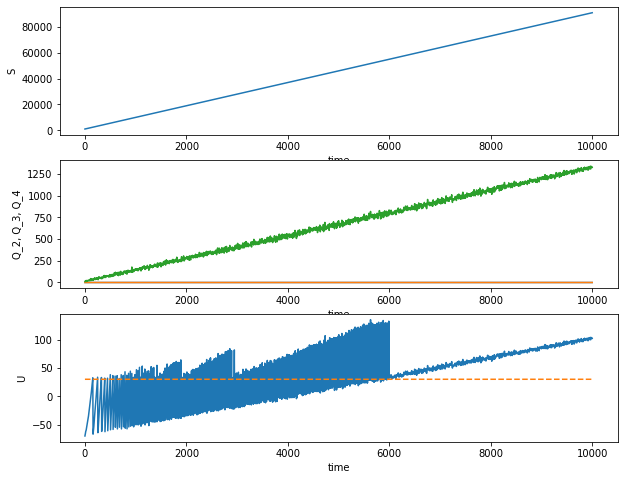

In [12]:
plot_result(times, S, Q_2, Q_3, Q_4, U, (10, 8))

In [13]:
def calculate_max_cnt_in_row(U):
    max_cnt_in_row = 1
    cur_cnt_in_row = 0
    for val in U:
        if val >= constants['U_spike']:
            cur_cnt_in_row += 1
        else:
            cur_cnt_in_row = 0
        if cur_cnt_in_row > max_cnt_in_row:
            max_cnt_in_row = cur_cnt_in_row
    return max_cnt_in_row

In [14]:
print(calculate_max_cnt_in_row(U))

803


[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.] [14. 12. 15. ... 17. 14. 14.]


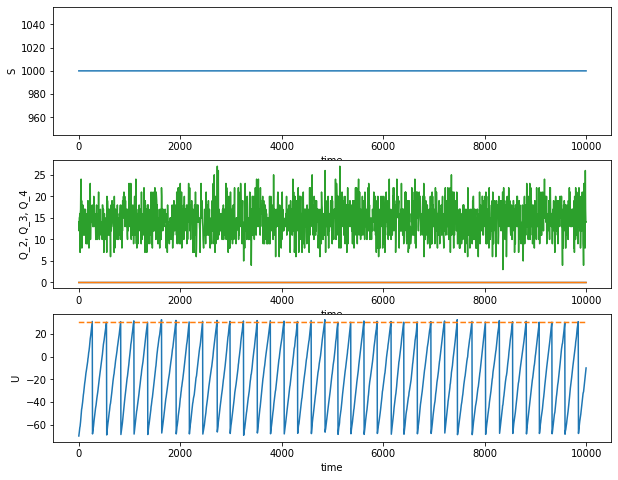

In [15]:
V_rel = 1100 # [1100 .. 1109]
# X + Y + Z = 1500
X = 0 # 2
Y = 0 # 3
Z = 1500 - X - Y # 4

S = calculate_S(np.array(times), V_rel)
Q_2 = calculate_Q(S, 2, X)
Q_3 = calculate_Q(S, 3, Y)
Q_4 = calculate_Q(S, 4, Z)
print(Q_2, Q_3, Q_4)
U = calculate_U(Q_2, Q_3, Q_4)

plot_result(times, S, Q_2, Q_3, Q_4, U, (10, 8))

[12.  9.  6. ... 14. 12.  8.] [0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]


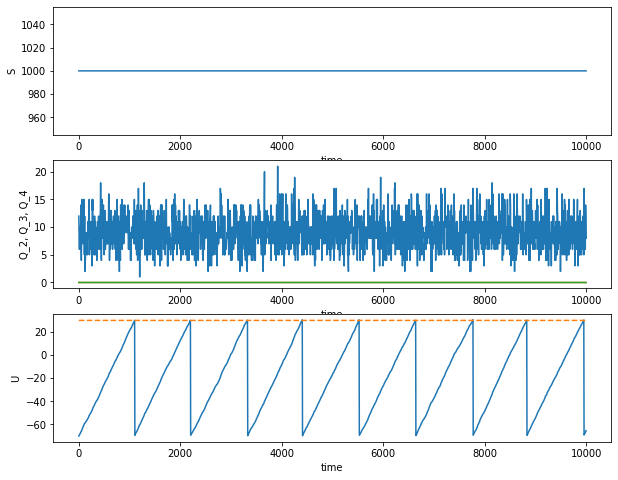

In [16]:
V_rel = 1100 # [1100 .. 1109]
# X + Y + Z = 1500
X = 1500 # 2
Y = 0 # 3
Z = 1500 - X - Y # 4

S = calculate_S(np.array(times), V_rel)
Q_2 = calculate_Q(S, 2, X)
Q_3 = calculate_Q(S, 3, Y)
Q_4 = calculate_Q(S, 4, Z)
print(Q_2, Q_3, Q_4)
U = calculate_U(Q_2, Q_3, Q_4)

plot_result(times, S, Q_2, Q_3, Q_4, U, (10, 8))